#1. Importar todas las librerías necesarias.

In [ ]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#2. Inicializar algunas variables que después modicaremos.

In [ ]:
hostnames = []
dataset=[]
df = None

#3. Crear una función para generar los hostnames en base a unas reglas.

In [ ]:
def set_hostnames(number_of_hosts: int) -> None:
  hostnames_so= ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10 #GENERA UNA DISTRIBUCION DE SISTEMA OPERATIVO: Linux 40% | Solaris: 30% | AIX: 20% | HP-UX: 10%
  hostnames_environment= ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30 #GENERA UNA DISTRIBUCION DE ENTORNO: Development 10% | Integration 10% | Testing: 25% | Staging: 25% | Production: 30%
  hostnames_country= ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30 #GENERA UNA DISTRIBUCION DE PAIS: Norway 6% | France 9% | Italy: 16% | Spain: 16% | Germany: 23% | Ireland: 30%
  grupo_alpha = []

  for i in range(number_of_hosts):
    hostname=random.choice(hostnames_so) + random.choice(hostnames_environment) + random.choice(hostnames_country)
    grupo_alpha.append(hostnames)
    hostname += str(grupo_alpha.count(hostnames)).zfill(3)
    hostnames.append(hostname)

#4. Crear una función para obtener el nombre del SO.

In [ ]:
def get_hostnames(hostnames: str) -> str:
  if hostnames.startswith('L'):
    return 'Linux'
  elif hostnames.startswith('S'):
    return 'Solaris'
  elif hostnames.startswith('A'):
    return 'AIX'
  elif hostnames.startswith('H'):
    return 'HP-UX'
  else:
    return 'Desconocido'

#5. Crear una función para obtener el nombre del entorno.

In [ ]:
def get_hostnames_enviroment(hostnames: str) -> str:
  hostnames_environment=hostnames[1]
  if hostnames_environment=='D':
    return 'Development'
  if hostnames_environment=='I':
    return 'Integration'
  if hostnames_environment=='T':
    return 'Testing'
  if hostnames_environment=='S':
    return 'Staging'
  if hostnames_environment=='P':
    return 'Production'
  else:
    return 'Desconocido'

#6. Crear una función para obtener el nombre del país.

In [ ]:
def get_hostnames_country(hostnames: str) -> str:
  hostnames_country=hostnames[2:5]
  if hostnames_country=='NOR':
    return ' Norway'
  if hostnames_country=='FRA':
    return 'France'
  if hostnames_country=='ITA':
    return 'Italy'
  if hostnames_country=='ESP':
    return 'Spain'
  if hostnames_country=='DEU':
    return 'Germany'
  if hostnames_country=='IRL':
    return 'Ireland'
  else:
    return 'Desconocido'

#7. Crear una función para generar el DataFrame.

In [ ]:
def set_dataframe(numero: int) -> None:
  global df

  set_hostnames(numero)

  for codigo in hostnames:
    dataset.append({
        'codigo_hostnames': codigo,
        'hostnames': get_hostnames(codigo),
        'enviroment':get_hostnames_enviroment(codigo),
        'country':get_hostnames_country(codigo),
        'numero':int(codigo[-3:])
    })
    df=pd.DataFrame(dataset)

#8. Crear el DataFrame.

In [ ]:
set_dataframe(1500)
df

,codigo_hostnames,hostnames,enviroment,country,numero
0,LTIRL001,Linux,Testing,Ireland,1
1,LDIRL002,Linux,Development,Ireland,2
2,LTDEU003,Linux,Testing,Germany,3
3,LDIRL004,Linux,Development,Ireland,4
4,LTESP005,Linux,Testing,Spain,5
...,...,...,...,...,...
1495,SPDEU1496,Solaris,Production,Germany,496
1496,HSFRA1497,HP-UX,Staging,France,497
1497,LDIRL1498,Linux,Development,Ireland,498
1498,LSNOR1499,Linux,Staging,Norway,499


#9. Guardar el DataFrame generado en un fichero CSV.

In [ ]:
df.to_csv(
    'hostnames.csv',
    header=True,
    index=False
)

df_hostnames=pd.read_csv('hostnames.csv')
df_hostnames

,codigo_hostnames,hostnames,enviroment,country,numero
0,LTIRL001,Linux,Testing,Ireland,1
1,LDIRL002,Linux,Development,Ireland,2
2,LTDEU003,Linux,Testing,Germany,3
3,LDIRL004,Linux,Development,Ireland,4
4,LTESP005,Linux,Testing,Spain,5
...,...,...,...,...,...
1495,SPDEU1496,Solaris,Production,Germany,496
1496,HSFRA1497,HP-UX,Staging,France,497
1497,LDIRL1498,Linux,Development,Ireland,498
1498,LSNOR1499,Linux,Staging,Norway,499


#10.Generar un único gráfico, agrupando para cada país (country) los entornos

<Axes: xlabel='hostnames'>

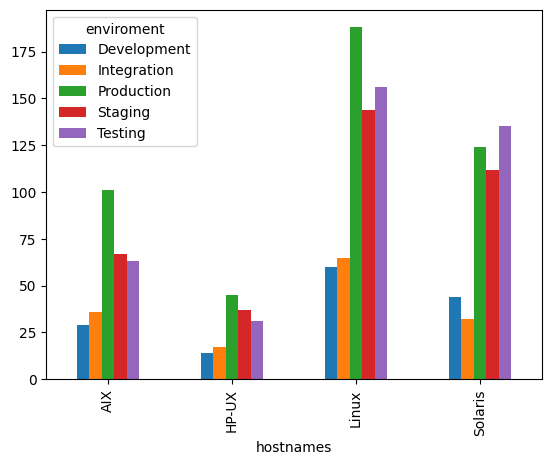

In [ ]:
g = df.groupby(['hostnames','enviroment']).size()
g.unstack().plot(kind='bar')

#11.Crear una gura con 4 gráficos en una malla de 2 las y 2 columnas.



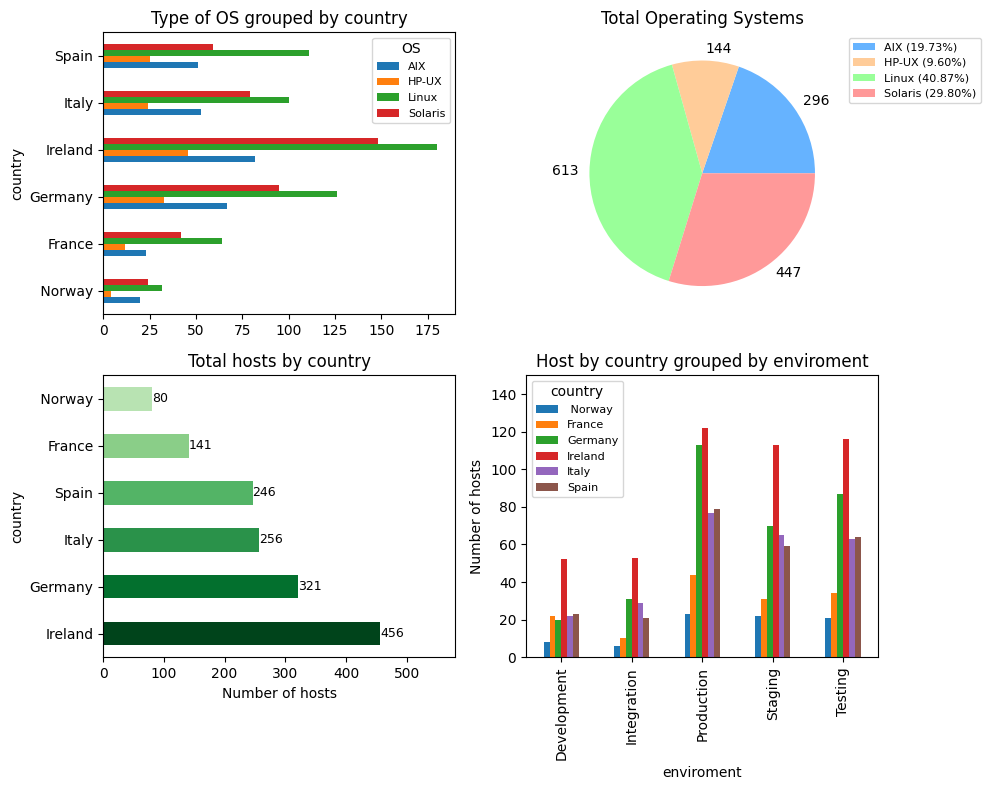

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

g = df.groupby(['country', 'hostnames']).size()

h= df.groupby(['hostnames','country']).size()

i=df.groupby(['enviroment','country']).size()

j=df.groupby(['hostnames']).size()


axs[0, 0].set_title('Type of OS grouped by country')
g.unstack().plot(kind='barh', ax=axs[0, 0])
axs[0, 0].legend(title='OS', fontsize=8)
axs[0,0].set_xlim([0, 190])


axs[0, 1].set_title('Total Operating Systems')
colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff9999']
wedges, texts = axs[0, 1].pie(j, colors=colors, labels=j.values)
total = j.sum()
legend_labels = [f"{label} ({value/total:.2%})" for label, value in zip(j.index, j.values)]
axs[0, 1].legend(wedges, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)



bars = df["country"].value_counts().plot(kind='barh', ax=axs[1, 0], color=plt.cm.Greens(np.linspace(1, 0.3, len(df["country"].unique()))))
axs[1, 0].set_title('Total hosts by country')
for container in bars.containers:
    axs[1, 0].bar_label(container, fmt='%.0f', fontsize=9)
axs[1, 0].set_xlabel('Number of hosts')
axs[1,0].set_xlim([0, 580])

axs[1, 1].set_title('Host by country grouped by enviroment')
i.unstack().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].legend(title='country', fontsize=8)
axs[1, 1].set_ylabel('Number of hosts')
axs[1,1].set_ylim([0, 150])


plt.tight_layout()
plt.show()